In [520]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler , LabelEncoder , OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report 

In [521]:
# loading the dataset 
df = pd.read_csv("Ds_Data.csv")
df.head(5)

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0


<h3>Data Preprocessing</h3>

In [522]:
#description of the numerical columns present in the dataset
df.describe(include=[np.number])

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [523]:
#We check the shape of the dataset that is number of rows and column present in the dataset
df.shape

(12684, 25)

In [524]:
#It displays the data types of each column in the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   coupon                12684 non-null  object
 5   expiration            12684 non-null  object
 6   gender                12684 non-null  object
 7   age                   12684 non-null  object
 8   maritalStatus         12684 non-null  object
 9   has_children          12684 non-null  int64 
 10  education             12684 non-null  object
 11  occupation            12684 non-null  object
 12  income                12684 non-null  object
 13  car                   108 non-null    object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [525]:
#We check for null values present in each column
df.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Accept(Y/N?)                0
dtype: int64

In [526]:
# We are deleting the car column as it as maximum number or null values
df1=df.drop(columns=['car'])
df1.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [527]:
# We check for the most frequent values occurring in the columns with null values.
fill_cols = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
mode_values = df1[fill_cols].mode().iloc[0]
mode_values


Bar                     never
CoffeeHouse             less1
CarryAway                 1~3
RestaurantLessThan20      1~3
Restaurant20To50        less1
Name: 0, dtype: object

In [528]:
# We filled the below null column with "never" and '1~3' as it was the most frequet value
fill_cols = ['CoffeeHouse', 'Restaurant20To50']
df1[fill_cols] = df1[fill_cols].fillna('less1')

df1[['CarryAway','RestaurantLessThan20']].fillna('1~3')
df1['Bar'].fillna('never',inplace=True)

In [567]:
# As we see now there is no null values persent in the dataset
df1.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Accept(Y/N?)            0
dtype: int64

In [530]:
#Before removing the Duplicate values in the dataset
df1.shape

(12684, 24)

In [531]:
#Dropped the duplicates values present in the dataset
df1.drop_duplicates(inplace=True)
df1.shape

(12393, 24)

<h3>Converting categorical column to numerical </h3>

In [532]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
le = LabelEncoder()

# List of nominal columns to encode
nominal_columns = ['destination', 'passanger', 'weather', 'coupon', 'expiration', 'gender', 'maritalStatus', 'education', 'occupation', 'income','age']

# Apply label encoding
for col in nominal_columns:
    df1[col] = le.fit_transform(df1[col])


In [533]:
df1.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,1,0,2,55,4,0,0,0,3,1,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,1,1,2,80,2,1,0,0,3,1,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,1,1,2,80,1,1,0,0,3,1,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,1,1,2,80,2,1,0,0,3,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,1,1,2,80,2,0,0,0,3,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [534]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12393 entries, 0 to 12683
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12393 non-null  int32 
 1   passanger             12393 non-null  int32 
 2   weather               12393 non-null  int32 
 3   temperature           12393 non-null  int64 
 4   coupon                12393 non-null  int32 
 5   expiration            12393 non-null  int32 
 6   gender                12393 non-null  int32 
 7   age                   12393 non-null  int32 
 8   maritalStatus         12393 non-null  int32 
 9   has_children          12393 non-null  int64 
 10  education             12393 non-null  int32 
 11  occupation            12393 non-null  int32 
 12  income                12393 non-null  int32 
 13  Bar                   12393 non-null  object
 14  CoffeeHouse           12393 non-null  object
 15  CarryAway             12245 non-null  obj

In [535]:
# Mapping for ordinal columns
ordinal_mappings = {
    'Bar': {'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4},
    'CoffeeHouse': {'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4},
    'CarryAway': {'never': 0, '1~3': 1, '4~8': 2, 'gt8': 3},
    'RestaurantLessThan20': {'never': 0, '1~3': 1, '4~8': 2, 'gt8': 3},
    'Restaurant20To50': {'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4}
}

# Apply mapping with handling for missing values
for col, mapping in ordinal_mappings.items():
    df1[col] = df1[col].map(mapping).fillna(-1)  # Replace NaNs with -1 or any default value



In [536]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12393 entries, 0 to 12683
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   destination           12393 non-null  int32  
 1   passanger             12393 non-null  int32  
 2   weather               12393 non-null  int32  
 3   temperature           12393 non-null  int64  
 4   coupon                12393 non-null  int32  
 5   expiration            12393 non-null  int32  
 6   gender                12393 non-null  int32  
 7   age                   12393 non-null  int32  
 8   maritalStatus         12393 non-null  int32  
 9   has_children          12393 non-null  int64  
 10  education             12393 non-null  int32  
 11  occupation            12393 non-null  int32  
 12  income                12393 non-null  int32  
 13  Bar                   12393 non-null  int64  
 14  CoffeeHouse           12393 non-null  int64  
 15  CarryAway             12

<h3> Outlier detection</h3>

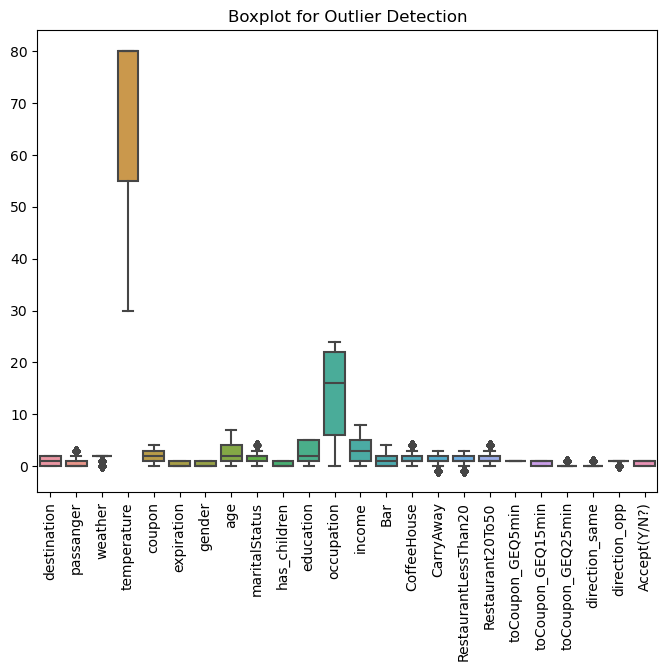

In [538]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df1)
plt.xticks(rotation=90)  # Rotate column labels for better readability
plt.title('Boxplot for Outlier Detection')
plt.show()

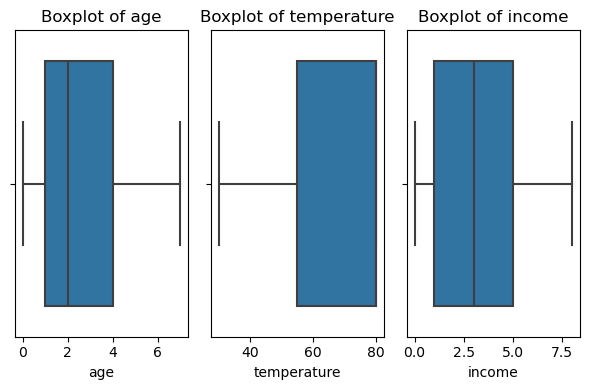

In [540]:
plt.figure(figsize=(6, 4))
for i, col in enumerate(['age', 'temperature', 'income'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=df1[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [541]:
df1.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,1,0,2,55,4,0,0,0,3,1,...,0,-1.0,2.0,2,1,0,0,0,1,1
1,1,1,2,80,2,1,0,0,3,1,...,0,-1.0,2.0,2,1,0,0,0,1,0
2,1,1,2,80,1,1,0,0,3,1,...,0,-1.0,2.0,2,1,1,0,0,1,1
3,1,1,2,80,2,1,0,0,3,1,...,0,-1.0,2.0,2,1,1,0,0,1,0
4,1,1,2,80,2,0,0,0,3,1,...,0,-1.0,2.0,2,1,1,0,0,1,0


<h3>Exploratory Data Analysis (EDA)</h3>

In [542]:
#Checking for correlations between the variables
corr=df1.corr()

c:\Users\rosha\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


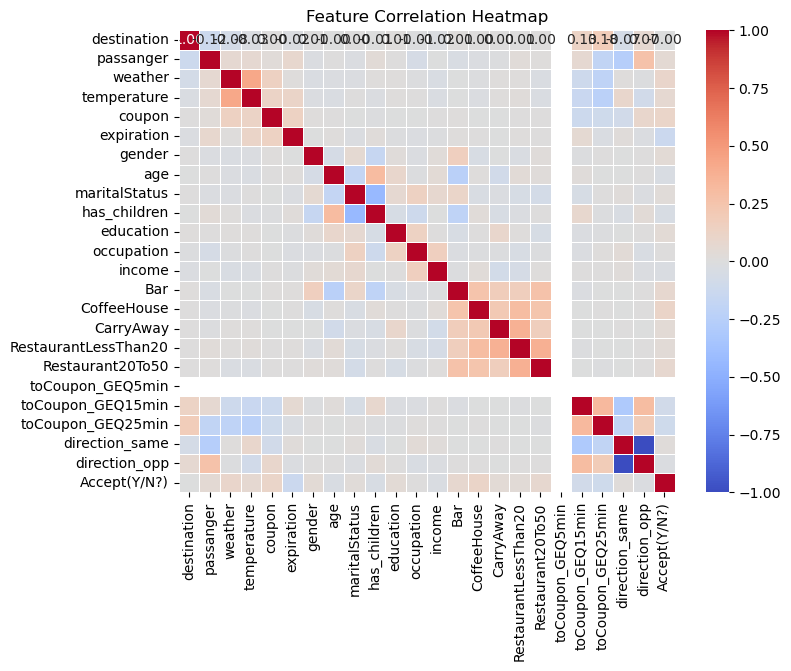

In [543]:
"""
Correlation Matrix: Displays the relationships between different features in the dataset. 
Strong correlations can provide insight into how features interact, helping identify important variables for prediction.
"""
plt.figure(figsize=(8, 6))  # Adjust figure size for better readability
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

1.The column toCoupon_GEQ5min has only one value and does not seem to be correlated with the aceept(Y/N?). Therefore, we should drop this column.
   
   
2.the columns direction_same and direction_opp are highly negative correlated so we can drop them.


In [544]:
df2=df1.drop(columns=['toCoupon_GEQ5min','direction_same','direction_opp'])
df2.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,Accept(Y/N?)
0,1,0,2,55,4,0,0,0,3,1,...,24,3,0,0,-1.0,2.0,2,0,0,1
1,1,1,2,80,2,1,0,0,3,1,...,24,3,0,0,-1.0,2.0,2,0,0,0
2,1,1,2,80,1,1,0,0,3,1,...,24,3,0,0,-1.0,2.0,2,1,0,1
3,1,1,2,80,2,1,0,0,3,1,...,24,3,0,0,-1.0,2.0,2,1,0,0
4,1,1,2,80,2,0,0,0,3,1,...,24,3,0,0,-1.0,2.0,2,1,0,0


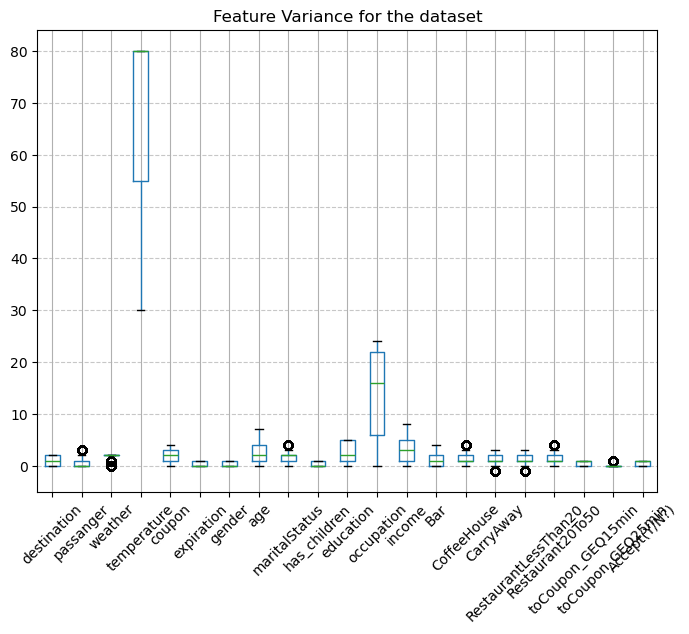

In [545]:
"""
Variance: Shows the distribution of feature values. Features with high variance may carry more information, 
while features with low variance could be less impactful or redundant.
"""
plt.figure(figsize=(8, 6))
df2.boxplot()
plt.title("Feature Variance for the dataset")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


c:\Users\rosha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\rosha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\rosha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


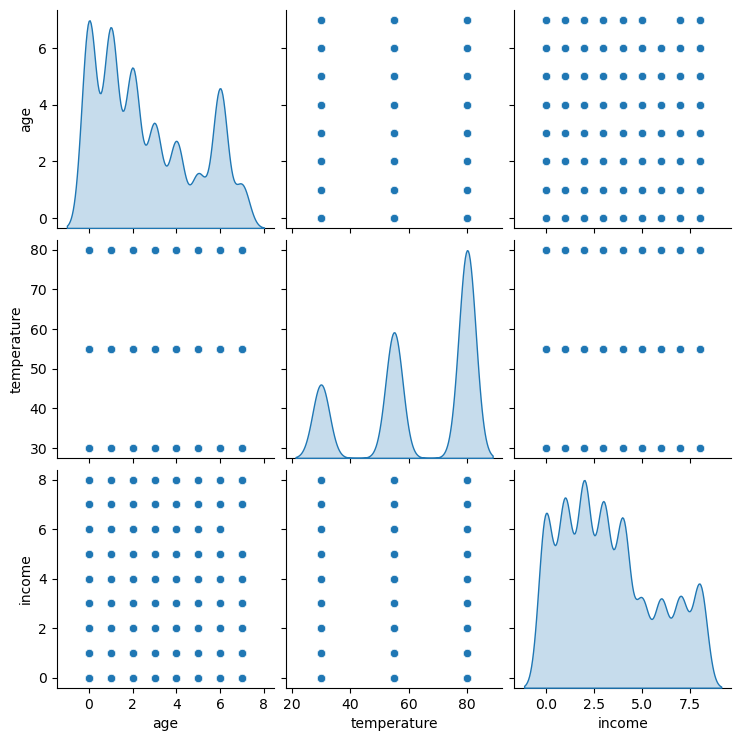

In [573]:
sns.pairplot(df2[['age', 'temperature', 'income']], diag_kind='kde')
plt.show()

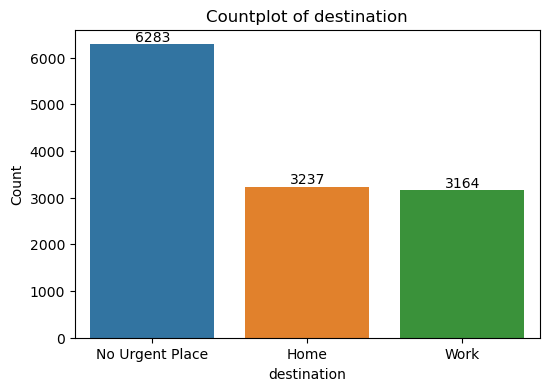

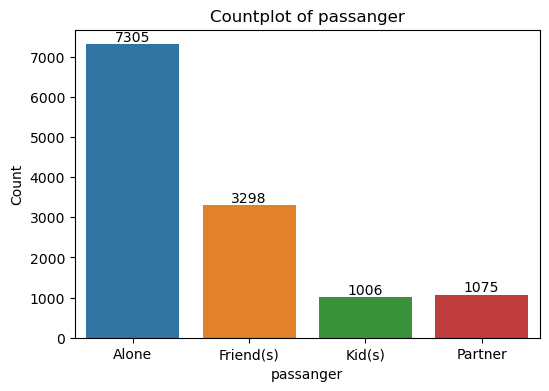

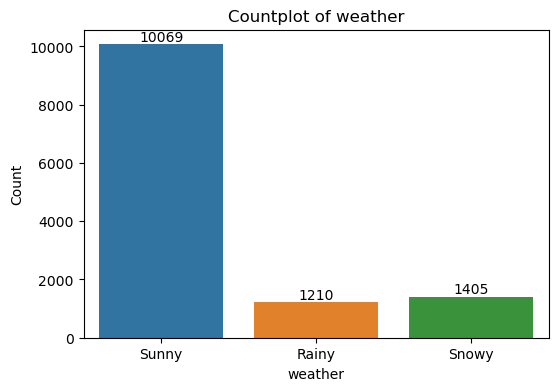

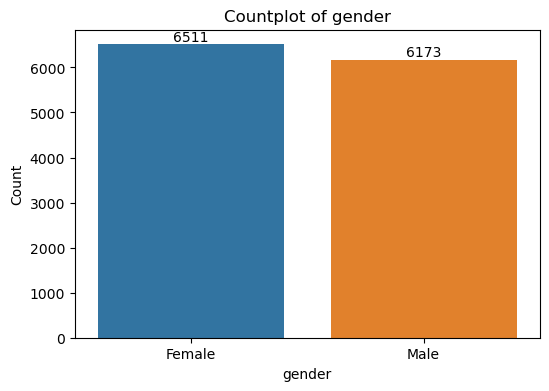

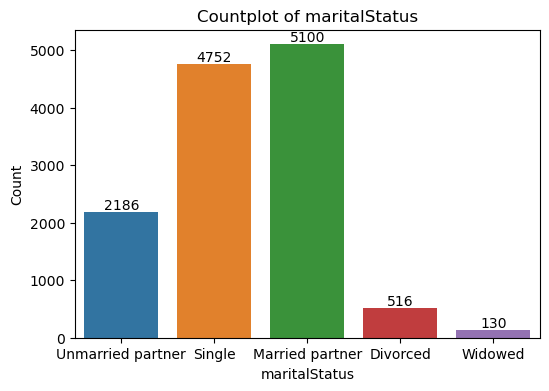

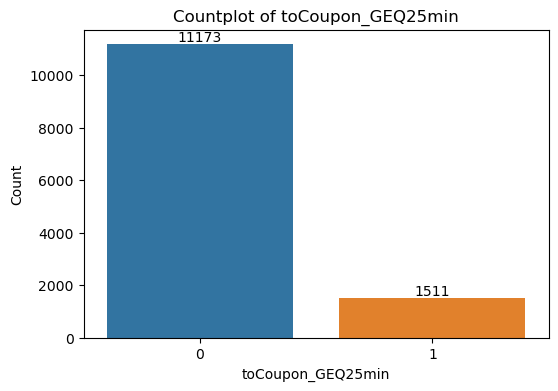

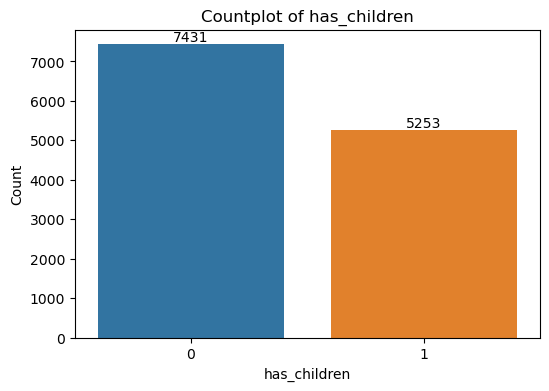

In [546]:
# Categorical columns
categorical_columns = ['destination', 'passanger', 'weather', 'gender', 'maritalStatus','toCoupon_GEQ25min','has_children',]

# Create countplots for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(x=df[column])
    plt.title(f'Countplot of {column}')
    plt.xlabel(column)  # Label for x-axis
    plt.ylabel('Count')  # Label for y-axis

  
    ax.bar_label(ax.containers[0], fmt='%.0f')
plt.show()


In [547]:
#From the boxplot, we observe that the "genders" are balanced, so this feature doesn't contribute significantly,
#which suggests that this feature can be removed.
# Removing toCoupon_GEQ25mins column as analysis shows coupon acceptance primarily happens within 5-15 minute travel distances
df2=df2.drop(columns=['gender','toCoupon_GEQ25min'],axis=1) 

<h3>Splitting data into x and y </h3>

In [548]:
#"Splitting the dataset into input (X) and output (Y) variables."
x=df2.drop(['Accept(Y/N?)'],axis="columns")
y=df2['Accept(Y/N?)']

<h3>Splitting the Data into Training and Testing Sets</h3>

In [549]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

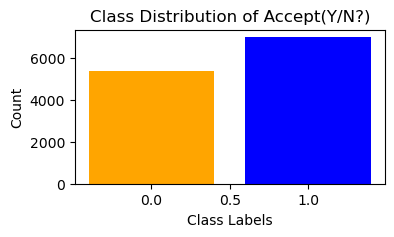

In [550]:
# checking the distribution of unbalaced column
y = df2['Accept(Y/N?)'].value_counts()

plt.figure(figsize=(4, 2))
plt.bar(y.index, y.values, color=['blue', 'orange'])
plt.title('Class Distribution of Accept(Y/N?)')
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.show()


In [551]:
#The above graph shows that dependent column is imbalanced so we use SMOTE to make the column balanced

smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)
print("Original class distribution (y_train):")
print(y_train.value_counts())
print("\nClass distribution after SMOTE (y_train_smote):")
print(y_train_smote.value_counts())



Original class distribution (y_train):
Accept(Y/N?)
1    5643
0    4271
Name: count, dtype: int64

Class distribution after SMOTE (y_train_smote):
Accept(Y/N?)
0    5643
1    5643
Name: count, dtype: int64


<h3>Feature Scaling</h3>

In [552]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)


 <h3>Model implementation</h3>

<h4>Logestic Regression</h4>

In [564]:
model_1=LogisticRegression(max_iter=500)
model_1.fit(x_train_smote,y_train_smote)

LogisticRegression(max_iter=500)

<h4>RandomForestClassifier</h4>

In [554]:
from sklearn.ensemble import RandomForestClassifier
model_2=RandomForestClassifier()
model_2.fit(x_train_smote,y_train_smote)

RandomForestClassifier()

<h4>Support vector Classifier</h4>

In [555]:
from sklearn.svm import SVC
model_3=SVC()
model_3.fit(x_train_smote,y_train_smote)

SVC()

<h3>Boosting Algorithms</h3>

<h4>GradientBoostingClassifier</h4>

In [568]:
from sklearn.ensemble import GradientBoostingClassifier

model_4= GradientBoostingClassifier(random_state=42)
model_4.fit(x_train_smote, y_train_smote)

GradientBoostingClassifier(random_state=42)

<h4>XGBClassifier</h4>

In [569]:
from xgboost import XGBClassifier

model_5= XGBClassifier(random_state=42)
model_5.fit(x_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

<h2> Model Performance</h2>

In [ ]:
print("the Accuracy  for Logestic regression:",model_1.score(x_test,y_test)*100)
print("the Accuracy  for Random forest classifier:",model_2.score(x_test,y_test)*100)
print("the Accuracy  for Support vector Classifier:",model_3.score(x_test,y_test)*100)
print("the Accuracy  for GradientBoostingClassifier:",model_4.score(x_test,y_test)*100)
print("the Accuracy  for XGBClassifier:",model_5.score(x_test,y_test)*100)

the Accuracy  for Logestic regression: 60.306575231948365
the Accuracy  for Random forest classifier: 72.93263412666397
the Accuracy  for Support vector Classifier: 58.85437676482452
the Accuracy  for GradientBoostingClassifier: 70.0282371924163
the Accuracy  for XGBClassifier: 73.41670028237192


<h3>Hyperparameter Tuning using GridSearchCV</h3>


In [559]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(estimator=model_2, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(x_train_smote, y_train_smote)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_test)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Score:", grid_search.best_score_*100)
print("Best Estimator:", best_rf)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-validation Score: 75.34120988810325
Best Estimator: RandomForestClassifier(n_estimators=200)


<h3>Evaluation of the model</h3>

In [560]:
from sklearn.metrics import classification_report, confusion_matrix

models = {
    "Logistic Regression": model_1,
    "Random Forest": model_2,
    "Support Vector Classifier": model_3,
    "Gradient Boosting": model_4,
    "XGBoost": model_5
}

model_scores = {name: model.score(x_test, y_test) for name, model in models.items()}
best_model_name = max(model_scores, key=model_scores.get)
best_model = models[best_model_name]

y_pred = best_model.predict(x_test)

print(f"Best Model: {best_model_name}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Best Model: XGBoost

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.67      0.69      1110
           1       0.75      0.79      0.77      1369

    accuracy                           0.73      2479
   macro avg       0.73      0.73      0.73      2479
weighted avg       0.73      0.73      0.73      2479


Confusion Matrix:
 [[ 745  365]
 [ 294 1075]]


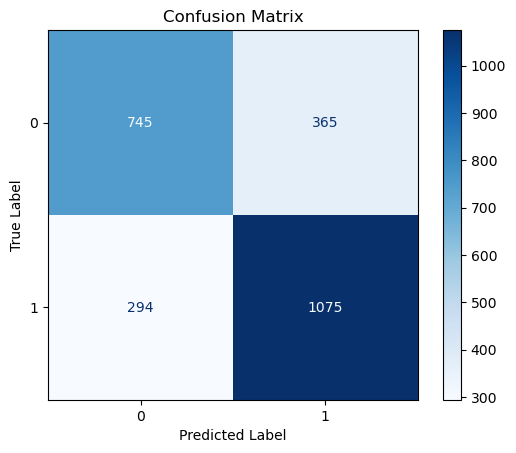

In [561]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

d = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
d.plot(cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


Conclusion

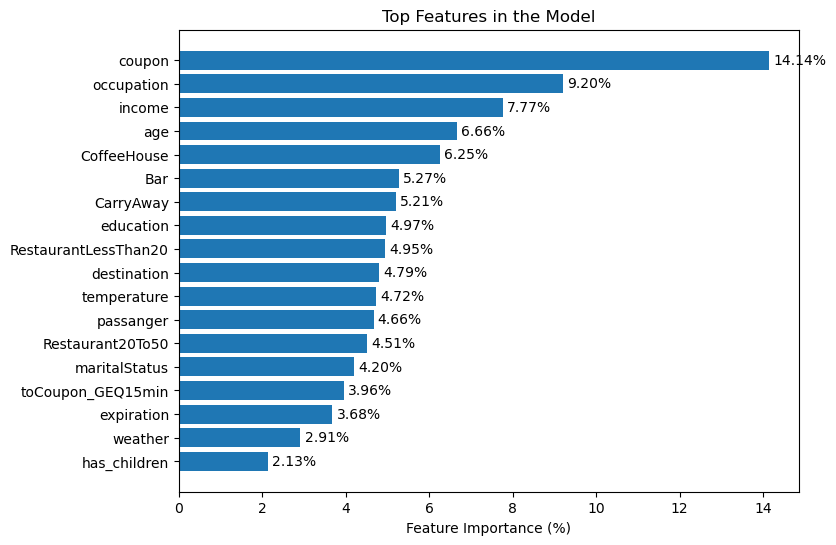

In [562]:
importances =model_2.feature_importances_ * 100
features = x.columns
indices = np.argsort(importances)

plt.figure(figsize=(8, 6))
bars = plt.barh(range(len(importances)), importances[indices], align="center")
plt.bar_label(bars, labels=[f'{x:.2f}%' for x in importances[indices]], padding=3)
plt.yticks(range(len(importances)), np.array(features)[indices])
plt.xlabel('Feature Importance (%)')
plt.title('Top Features in the Model')
plt.show()


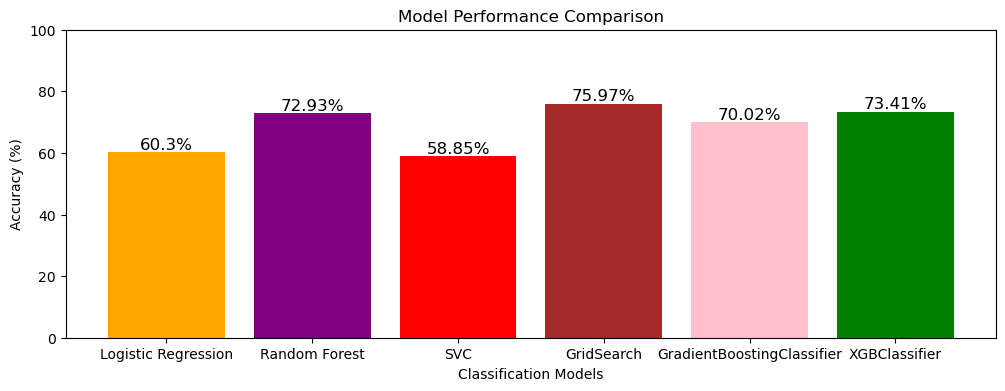

In [577]:
import matplotlib.pyplot as plt

models = ["Logistic Regression", "Random Forest", "SVC", "GridSearch","GradientBoostingClassifier","XGBClassifier"]
accuracy = [60.30, 72.93, 58.85, 75.97,70.02,73.41]

plt.figure(figsize=(12, 4))
plt.bar(models, accuracy, color=['orange', 'purple', 'red', 'brown','pink','green'])
plt.xlabel("Classification Models")
plt.ylabel("Accuracy (%)")
plt.title("Model Performance Comparison")
plt.ylim(0, 100)

for i in range(len(models)):
    plt.text(i, accuracy[i] + 1, f"{accuracy[i]}%", ha='center', fontsize=12)
plt.show()
